In [1]:
#Dear Reader: If using CoLab, remove the # from the line below and shift-return to install rebound
#!pip install rebound

In [2]:
#interactive playing with moon (changing mass, radius, velocity)

import rebound
from ipywidgets import *
import math

AM = 4.5e9 #roughly current AM of Earth in Msun au^2 yr^-1
M_sun = 1.99e30 #kg solar mass as central body

def pltAM(delmass,inclin,ecc):
    mass = (delmass + 1e24)/M_sun
    mass_Earth = 1e24/M_sun
    sim = rebound.Simulation()
    sim.units = ('yr', 'AU', 'Msun') #use astronomical units
    sma = (AM**2)/(sim.G*M_sun*(mass**2)) #calculate semi-major axis
    sma_Earth = (AM**2)/(sim.G*M_sun*(mass_Earth**2)) #calculate semi-major axis
    sim.add(m=1) #solar mass as central body
    sim.add(m=mass_Earth,a=sma_Earth,e=ecc,inc=inclin) #add Earth
    sim.add(m=mass,a=sma,e=ecc,inc=inclin) #add planet
    sim.move_to_com()
    fig,ax,ax2,ax3 = rebound.OrbitPlot(sim,color=True,unitlabel="[au]",slices=1)
    if sma < sma_Earth:
        limit = 2.*sma_Earth
    else:
        limit = 2.*sma
    ax.set_xlim([-limit,limit])
    ax.set_ylim([-limit,limit])
    ax2.set_xlim([-limit,limit])
    ax2.set_ylim([-limit,limit])
    ax3.set_xlim([-limit,limit])
    ax3.set_ylim([-limit,limit])
    ps=sim.particles
    print('The orbit of an Earth-mass planet is shown in red.')
    if delmass > 0:
        print('The enlarged-mass planet (cyan) has an orbital period of {0:.2f} years.'.format(ps[2].P))
    else:
        print('The reduced-mass planet (cyan) has an orbital period of {0:.2f} years.'.format(ps[2].P))

style = {'description_width': 'initial'}
layout = {'width': '400px'}
#mass is in kg
interact(pltAM,
        delmass = widgets.Dropdown(
             options=[('-50% Earth', -5e23),
                      ('-40% Earth', -4e23),
                      ('-30% Earth', -3e23),
                      ('-20% Earth', -2e23),
                      ('-10% Earth', -1e23),
                      ('+10% Earth', 1e23),
                      ('+20% Earth', 2e23),
                      ('+30% Earth', 3e23),
                      ('+40% Earth', 4e23),
                      ('+50% Earth', 5e23)],
             value=1e23, description='Change in mass of planet (kg)', style=style),
        inclin = FloatSlider(value=0, max=math.pi, step=0.2, description='Inclination of orbit (radians)',
                        continuous_update=False, readout=True, readout_format='.1f', style=style, layout=layout),
        ecc = FloatSlider(value=0, max=0.9, step=0.1, description='Eccentricity of orbit (unitless)',
                        continuous_update=False, readout=True, readout_format='.1f', style=style, layout=layout),
        )

interactive(children=(Dropdown(description='Change in mass of planet (kg)', index=5, options=(('-50% Earth', -…

<function __main__.pltAM(delmass, inclin, ecc)>

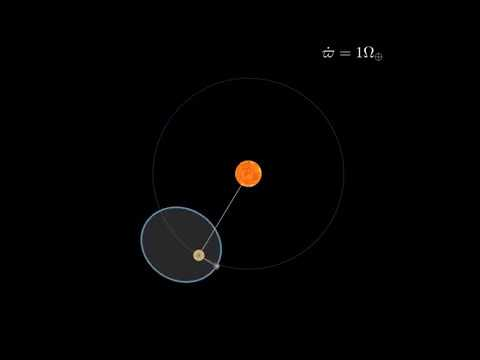

In [3]:
from IPython.display import YouTubeVideo
YouTubeVideo('WjFdKFbMrAY', width=640, height=360)